# Mount gdrive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Model import

### Model_facial sensor

In [1]:
################### 1d cnn model #######################################
import torch
import torch.nn as nn
import torch.nn.functional as F
#import customdataset as cd
from torch.utils.data import TensorDataset # tensordatasets
from torch.utils.data import DataLoader # dataloader

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print("Train with following device:", device)

# fix random seed (for reproducibility)
torch.manual_seed(777)

# fix random seed if GPU is available
if device == 'cuda':
    torch.cuda.manual_seed_all(777)
    
learning_rate = 0.001
training_epochs = 999

class CNN1d(nn.Module):

    def __init__(self):
        super(CNN1d, self).__init__()
        # 1st layer (CNN)
        self.layer1 = nn.Sequential(
            nn.Conv1d(5, 16, 1),
            nn.BatchNorm1d(16),
            nn.Tanh())

        # 2nd layer (CNN)
        self.layer2 = nn.Sequential(
            nn.Conv1d(16, 32, 1),
            nn.BatchNorm1d(32),
            nn.Tanh())
        
        # 3rd layer (CNN)
        self.layer3 = nn.Sequential(
            nn.Conv1d(32, 64, 1),
            nn.BatchNorm1d(64),
            nn.Tanh())

        # 4th layer (GAP)
        self.layer4 = nn.Sequential(
            nn.AdaptiveAvgPool1d(1),
            nn.Tanh())

        # 5th layer (FC)
        self.layer5 = nn.Sequential(
            nn.Linear(64, 5, bias=True),
            nn.Tanh())

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out) 
        out = out.view(out.shape[0], -1)
        out = self.layer5(out)
        return out

# Define CNN model
model_facial = CNN1d().to(device)

Exception ignored in: <function WeakSet.__init__.<locals>._remove at 0x7f9451947f40>
Traceback (most recent call last):
  File "/usr/lib/python3.10/_weakrefset.py", line 39, in _remove
    def _remove(item, selfref=ref(self)):
KeyboardInterrupt: 


다음 기기로 학습합니다: cpu


### Model_vocal sensor

In [2]:
################### 2d cnn model #######################################
import torch
import torch.nn as nn
import torch.nn.functional as F
import copy
from torch.utils.data import TensorDataset 
from torch.utils.data import DataLoader 

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print("Train with the following device", device)

# fix random seed (for reproducibility)
torch.manual_seed(777)

# fix random seed if GPU is available
if device == 'cuda':
    torch.cuda.manual_seed_all(777)
    
learning_rate = 0.001
training_epochs = 199

class CNN2d(nn.Module):

    def __init__(self):
        super(CNN2d, self).__init__()
        # 1st layer (CNN)
        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 32, 3),
            nn.BatchNorm2d(32),
            nn.Tanh(),
            nn.MaxPool2d(2))
        

        # 2nd layer (CNN)
        self.layer2 = nn.Sequential(
            nn.Conv2d(32, 64, 3),
            nn.BatchNorm2d(64),
            nn.Tanh(),
            nn.MaxPool2d(2))
        
        # 3rd layer (CNN)
        self.layer3 = nn.Sequential(
            nn.Conv2d(64, 128, 3),
            nn.BatchNorm2d(128),
            nn.Tanh(),
            nn.MaxPool2d(2))

        # 4th layer (GAP)
        self.layer4 = nn.Sequential(
            nn.AdaptiveAvgPool2d(1),
            nn.Tanh())

        # 5th layer (FC)
        self.layer5 = nn.Sequential(
            nn.Linear(128, 5, bias=True),
            nn.Softmax(dim=1))


    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out) 
        out = out.view(out.shape[0], -1)
        out = self.layer5(out)
        return out

# Define CNN model  
model_vocal = CNN2d().to(device)

다음 기기로 학습합니다: cpu


# Transfer Learning

### Facial_Dataset

In [ ]:
####################### raw data ################################
import torch
import torch.nn.functional as F
import os
import pandas as pd

# Load files in datasets
# 21~132: 
f_list_Facial = ['Happiness', 'Surprise', 'Disgust', 'Anger', 'Sadness']

df1_f = pd.DataFrame() # x_trainset rawdata
df2_f = pd.DataFrame() # x_testset rawdata
df3_f = [] # y_trainset rawdata
df4_f = [] # y_testset rawdata

for i in f_list_Facial:
    path = '/content/gdrive/MyDrive/sensorData_a/' + i + '/'
    file_list = os.listdir(path)
    file_list_py = [file for file in file_list if file.endswith('xlsx')] 

    for j in file_list_py:
#######################################ORIGINAL################################################
        # if int(j[0:-5]) <= 14:
        #     d1_f = pd.read_excel(path + j, header=None, index_col=None)
        #     d1_f = pd.DataFrame(data=d1_f).transpose()
        #     df1_f = pd.concat([df1_f,d1_f])
        #     df3_f.append(f_list_Facial.index(i))
        # elif 14 < int(j[0:-5]) <= 20:
        #     d2_f = pd.read_excel(path + j, header=None, index_col=None)
        #     d2_f = pd.DataFrame(data=d2_f).transpose()
        #     df2_f = pd.concat([df2_f,d2_f])
        #     df4_f.append(f_list_Facial.index(i))
        # else:
        #     pass
#######################################JITTERING############################################### 
        # if int(j[0:-5]) <= 14 or 20 < int(j[0:-5]) <= 132: #(1~14 && 21~132 Jittering)
        #     d1_f = pd.read_excel(path + j, header=None, index_col=None)
        #     d1_f = pd.DataFrame(data=d1_f).transpose()
        #     df1_f = pd.concat([df1_f,d1_f])
        #     df3_f.append(f_list_Facial.index(i))
        if 16 < int(j[0:-5]) <= 20:
            d2_f = pd.read_excel(path + j, header=None, index_col=None)
            d2_f = pd.DataFrame(data=d2_f).transpose()
            df2_f = pd.concat([df2_f,d2_f])
            df4_f.append(f_list_Facial.index(i))
        else:
            pass
#######################################SCALING###############################################       
        # if int(j[0:-5]) <= 14 or 132 < int(j[0:-5]) <= 244: #(1~14 && 133~244 Sacling)
        #     d1_f = pd.read_excel(path + j, header=None, index_col=None)
        #     d1_f = pd.DataFrame(data=d1_f).transpose()
        #     df1_f = pd.concat([df1_f,d1_f])
        #     df3_f.append(f_list_Facial.index(i))
        # elif 14 < int(j[0:-5]) <= 20:
        #     d2_f = pd.read_excel(path + j, header=None, index_col=None)
        #     d2_f = pd.DataFrame(data=d2_f).transpose()
        #     df2_f = pd.concat([df2_f,d2_f])
        #     df4_f.append(f_list_Facial.index(i))
        # else:
        #     pass
#######################################TWARPING############################################### 
        # if int(j[0:-5]) <= 14 or 244 < int(j[0:-5]) <= 356: #(1~14 && 245~356 Sacling)
        #     d1_f = pd.read_excel(path + j, header=None, index_col=None)
        #     d1_f = pd.DataFrame(data=d1_f).transpose()
        #     df1_f = pd.concat([df1_f,d1_f])
        #     df3_f.append(f_list_Facial.index(i))
        # elif 14 < int(j[0:-5]) <= 20:
        #     d2_f = pd.read_excel(path + j, header=None, index_col=None)
        #     d2_f = pd.DataFrame(data=d2_f).transpose()
        #     df2_f = pd.concat([df2_f,d2_f])
        #     df4_f.append(f_list_Facial.index(i))
        # else:
        #     pass
#######################################MWarping############################################### 
        # if int(j[0:-5]) <= 14 or 356 < int(j[0:-5]) <= 468: #(1~14 && 357~468 Sacling)
        #     d1_f = pd.read_excel(path + j, header=None, index_col=None)
        #     d1_f = pd.DataFrame(data=d1_f).transpose()
        #     df1_f = pd.concat([df1_f,d1_f])
        #     df3_f.append(f_list_Facial.index(i))
        # elif 14 < int(j[0:-5]) <= 20:
        #     d2_f = pd.read_excel(path + j, header=None, index_col=None)
        #     d2_f = pd.DataFrame(data=d2_f).transpose()
        #     df2_f = pd.concat([df2_f,d2_f])
        #     df4_f.append(f_list_Facial.index(i))
        # else:
        #     pass

    df1_f = df1_f.reset_index(drop = True)
    df1_f = df1_f.iloc[:,0:64]
    df2_f = df2_f.reset_index(drop = True)
    df2_f = df2_f.iloc[:,0:64] 

# convert to tensor

df1_np = pd.DataFrame.to_numpy(df1_f)
df2_np = pd.DataFrame.to_numpy(df2_f)
x_train_f = torch.FloatTensor(df1_np).to(device)# + torch.FloatTensor([1.])
x_test_f = torch.FloatTensor(df2_np).to(device)# + torch.FloatTensor([1.])
y_train_f = torch.LongTensor(df3_f).to(device)
y_test_f = torch.LongTensor(df4_f).to(device)

# expand dimention

# x_train_f = x_train_f.unsqueeze(0).to(device)
# x_train_f = x_train_f.reshape(630,5,64).to(device) 
x_test_f = x_test_f.unsqueeze(0).to(device)
x_test_f = x_test_f.reshape(20,5,64).to(device)

In [ ]:
import torch
import torch.nn.functional as F
import os
import pandas as pd
import numpy as np
#import rawdata as rd
from torch.utils.data import Dataset
from torch.utils.data import DataLoader


# Custom_Dataset 

class CustomDataset_train(Dataset):
    # Data preprosessing of the dataset
    def __init__(self): # x 
        self.x_data = x_train_f
        self.y_data = y_train_f 
    
    # Length of the dataset, # of samples
    def __len__(self):
        return len(self.x_data)
    
    # Load one data in the dataset
    def __getitem__(self, idx):
        x = self.x_data[idx]
        y = self.y_data[idx]
        return x, y

class CustomDataset_test(Dataset):
    # Data preprosessing of the dataset
    def __init__(self): 
        self.x_data = x_test_f 
        self.y_data = y_test_f 
    
    # Length of the dataset, # of samples
    def __len__(self):
        return len(self.x_data)
    
    # Load one data in the dataset
    def __getitem__(self, idx):
        x = self.x_data[idx]
        y = self.y_data[idx]
        return x, y
    
# train_dataset_f = CustomDataset_train()
test_dataset_f = CustomDataset_test()
# train_dataloader_f = DataLoader(train_dataset_f, batch_size=1, shuffle=True)
test_dataloader_f = DataLoader(test_dataset_f, batch_size=1, shuffle=False)

### Vocal_Dataset

In [ ]:
from PIL import Image
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader

import numpy as np
import torchvision
from torchvision import transforms

trans = transforms.Compose([transforms.Resize((100,100)),
                            transforms.ToTensor(), 
                            transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))])

# trainset_v = torchvision.datasets.ImageFolder(root='/content/gdrive/MyDrive/spectrogram_plt/trainset', 
#                                             transform=trans)
testset_v = torchvision.datasets.ImageFolder(root='/content/gdrive/MyDrive/Transfer_Learning/Vocal_Dataset/testset', 
                                           transform=trans)
# train_dataloader_v = DataLoader(trainset_v, batch_size=1, shuffle=True, num_workers=2)
test_dataloader_v = DataLoader(testset_v, batch_size=1, shuffle=False, num_workers=2)

# classes = trainset_v.classes

### Facial sensor data 

In [ ]:
#Display facial expression graph
import os
import time
import pandas as pd
import matplotlib.pyplot as plt
import random as rd
from google.colab import output

f_list_Facial = ['Happiness', 'Surprise', 'Disgust', 'Anger', 'Sadness']

for i in f_list_Facial:
    for j in range(10):
        path = '/content/gdrive/MyDrive/sensorData_a/' + i + '/'
        file_list = os.listdir(path)
        file_list_py = [file for file in file_list if file.endswith('xlsx')] #5 data

        #randomly pick
        rand_j = rd.choice(file_list_py)
        d1 = pd.read_excel(path + rand_j, header=None, index_col=None)
        d1 = d1.iloc[0:64,:]
  
        time.sleep(5)
        plt.figure()
        print(d1)
        plt.plot(d1)
        plt.title("%s" % i)
        plt.axis([0,64,-1.5,1.5])
        plt.pause(5)
        output.clear()
        

### Vocal sensor data

In [ ]:
#Display vocal graph
import os
import time
import pandas as pd
import matplotlib.pyplot as plt
import random as rd
from google.colab import output
from matplotlib.image import imread
from PIL import Image
import cv2
from google.colab.patches import cv2_imshow

f_list_Vocal = ['A', 'B', 'C', 'HELLO', 'ILOVEU']

for i in f_list_Vocal:
    for j in range(10):
        path = '/content/gdrive/MyDrive/Vocal_Datasets/' + i + '/'
        file_list = os.listdir(path)
        file_list_py = [file for file in file_list if file.endswith('xlsx')] #5 data
        
        d1 = pd.read_excel(path + file_list_py[j], header=None, index_col=None)
        d1 = d1.iloc[0:35000,:]

        path_stft = '/content/gdrive/MyDrive/spectrogram/trainset/' + i + '/' + str(j+1) + '.png'
        src = cv2.imread(path_stft, cv2.IMREAD_COLOR)
        img = cv2.resize(src, dsize=(400, 300), interpolation=cv2.INTER_LINEAR)

        time.sleep(5)
        plt.figure()
        print(d1)
        plt.plot(d1)
        plt.title("%s" % i)
        plt.axis([0,35000,-10,10])
        plt.pause(2)
        # output.clear()
        cv2_imshow(img)
        plt.pause(5)
        output.clear()

### Fine-tuning & Testing

In [ ]:
################################ Testing #######################################
PATH_f = F"/content/gdrive/MyDrive/cnn_net_tanh1000_scaling.pth"
PATH_v = F"/content/gdrive/MyDrive/spectrogram_plt/v-net(2d)_bs=1_#k=32_ks=3_lr=0.001_epoch=1000_4tanh+1sm(with MP).pth"

model_facial.load_state_dict(torch.load(PATH_f, map_location=device))
model_vocal.load_state_dict(torch.load(PATH_v, map_location=device))

# correct = 0
# total = 0

# with torch.no_grad():
#     for data in test_dataloader:
#         images, labels = data
#         outputs = model(images)
#         _, predicted = torch.max(outputs.data, 1)
#         total += labels.size(0)
#         correct += (predicted == labels).sum().item()
#         #print("labels:",labels.item(), "", "predicted:",predicted.item())

# print(PATH)
# print('Accuracy of the network on the 70 data: %f %%' % (
#     100 * correct / total))

<All keys matched successfully>

### Confusion Matrix

In [ ]:
#confusion matrix_facial
time.sleep(2)

import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.metrics import confusion_matrix

labels_arr_f = []
predicted_arr_f = []

correct_f = 0
total_f = 0

for data in test_dataloader_f:
    images_f, labels_f = data
       
    outputs_f = model_facial(images_f)
       
    _, predicted_f = torch.max(outputs_f.data, 1)

    total_f += labels_f.size(0)
    correct_f += (predicted_f == labels_f).sum().item()

    labels_arr_f.append(labels_f.item())
    predicted_arr_f.append(predicted_f.item())

print(labels_arr_f)
print(predicted_arr_f)

threshold = 60
conf_matrix = confusion_matrix(y_true=labels_arr_f, y_pred=predicted_arr_f)        
fig, ax = plt.subplots(figsize=(5, 5))
#ax.set_xticks([0,1,2,3,4])
ax.set_xticklabels(['','Happiness', 'Surprise', 'Disgust', 'Anger', 'Sadness'])
#ax.set_yticks([0,1,2,3,4])
ax.set_yticklabels(['','Happiness', 'Surprise', 'Disgust', 'Anger', 'Sadness'])
#ax.set_title('Confusion Matrix', y=1.0, pad=14)
conf_m = ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha = 1.0)
#plt.colorbar(conf_m, ax = , ticks = [])
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        if conf_matrix[i, j] > threshold:
            ax.text(x=j, y=i,s= (conf_matrix[i, j]), va='center', ha='center', size='x-large', color = 'w')
        else:
            ax.text(x=j, y=i,s= (conf_matrix[i, j]), va='center', ha='center', size='x-large')

plt.tick_params(axis = "x", which = "both", bottom = False, top = True)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Predicted label', fontsize=14, labelpad=20)
plt.ylabel('True label', fontsize=14)
plt.title('Accuracy: %.2f' %(100 * correct_f / total_f)+"%", fontsize=18, pad = 20, weight = 'bold')

plt.show()

#confusion matrix_vocal

correct_v = 0
total_v = 0

labels_arr_v = []
predicted_arr_v = []

for data in test_dataloader_v:
    images_v, labels_v = data
       
    outputs_v = model_vocal(images_v)
       
    _, predicted_v = torch.max(outputs_v.data, 1)

    total_v += labels_v.size(0)
    correct_v += (predicted_v == labels_v).sum().item()

    labels_arr_v.append(labels_v.item())
    predicted_arr_v.append(predicted_v.item())

print(labels_arr_v)
print(predicted_arr_v)

threshold = 60
conf_matrix = confusion_matrix(y_true=labels_arr_v, y_pred=predicted_arr_v)        
fig, ax = plt.subplots(figsize=(5, 5))
#ax.set_xticks([0,1,2,3,4])
ax.set_xticklabels(['','A', 'B', 'C', 'HELLO', 'I LOVE U'])
#ax.set_yticks([0,1,2,3,4])
ax.set_yticklabels(['','A', 'B', 'C', 'HELLO', 'I LOVE U'])
#ax.set_title('Confusion Matrix', y=1.0, pad=14)
conf_m = ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha = 1.0)
#plt.colorbar(conf_m, ax = , ticks = [])
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        if conf_matrix[i, j] > threshold:
            ax.text(x=j, y=i,s= (conf_matrix[i, j]), va='center', ha='center', size='x-large', color = 'w')
        else:
            ax.text(x=j, y=i,s= (conf_matrix[i, j]), va='center', ha='center', size='x-large')

plt.tick_params(axis = "x", which = "both", bottom = False, top = True)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Predicted label', fontsize=14, labelpad=20)
plt.ylabel('True label', fontsize=14)
plt.title('Accuracy: %.2f' %(100 * correct_v / total_v)+"%", fontsize=18, pad = 20, weight = 'bold')

plt.show()


# Real Time Classification

In [ ]:
import scipy
from scipy import signal

def butter_bandstop_filter(data, lowcut, highcut, fs, order):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = scipy.signal.butter(order, [low, high], btype='bandstop')
    y = signal.lfilter(b, a, data)
    return y

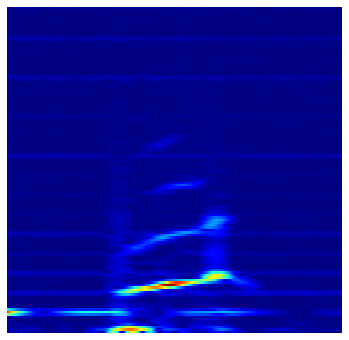

In [ ]:
################################ RTC_Pre-processing ####################################################################
import torch
import torch.nn as nn
import torch.nn.functional as F
import os
import pandas as pd
import numpy as np
from scipy.fft import fftshift
from scipy.signal import spectrogram
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image
import torchvision
from torchvision import transforms
%matplotlib inline

# facial data

# Load files

path_facial = '/content/gdrive/MyDrive/Real_Time_Classification/Facial_RTC/test_f2.xlsx'

d1_facial_rtc = pd.read_excel(path_facial, header=None, index_col=None)
d1_facial_rtc = pd.DataFrame(data=d1_facial_rtc).transpose()
d1_facial_rtc = d1_facial_rtc.reset_index(drop = True)
d1_facial_rtc = d1_facial_rtc.iloc[:,0:64]
d1_facial_rtc = pd.DataFrame.to_numpy(d1_facial_rtc)

# convert to tensor

d1_facial_rtc = torch.FloatTensor(d1_facial_rtc).to(device)

# expand dimension of the data
data_facial = d1_facial_rtc.unsqueeze(0).to(device)

# vocal data

path_vocal = '/content/gdrive/MyDrive/Real_Time_Classification/Vocal_RTC/test_v3.xlsx'

d1_vocal_rtc = pd.read_excel(path_vocal, header=None, index_col=None)
d1_vocal_rtc = pd.DataFrame(data=d1_vocal_rtc).transpose()
d1_vocal_rtc = d1_vocal_rtc.reset_index(drop = True)
d1_vocal_rtc = d1_vocal_rtc.iloc[:,0:35000] 
d1_np_vocal_rtc = pd.DataFrame.to_numpy(d1_vocal_rtc)
path_stft = '/content/gdrive/MyDrive/Real_Time_Classification/Vocal_RTC/test_v3.png'

###########################################Band_Block_Filter############################################################
data = d1_np_vocal_rtc
fs = 3.125e4
lowcut = 59
highcut = 61
order = 2
signal_filtered = butter_bandstop_filter(data, lowcut, highcut, fs, order)

###########################################Shor_Time_Fourier_Transformation#############################################        
x = signal_filtered
fs = 3.125e4
windowsize = 2**12
window = np.hanning(windowsize)
nfft = windowsize
noverlap = 4e3

f, t, Sxx = spectrogram(x, fs, window = window, noverlap = noverlap, nfft = nfft, scaling = 'density', mode = 'magnitude')
Sxx = np.squeeze(Sxx)

plt.figure(figsize = (6, 6))
plt.ylim(0,1000)
plt.pcolormesh(t, f, Sxx, cmap = 'jet', vmin = 0)
plt.ylabel('Frequency [Hz]', fontsize = 15)
plt.xlabel('Time [sec]', fontsize = 15)
plt.axis('off')
plt.savefig(path_stft, bbox_inches = 'tight', pad_inches = 0, dpi = 300)
# plt.savefig(path_stft + i + '/' + j[0:-5] + '.png', bbox_inches = 'tight', pad_inches = 0, dpi = 300)
# plt.close()


SPG = Image.open(path_stft).convert('RGB')
trans = transforms.Compose([transforms.Resize((100,100)),
                            transforms.ToTensor(), 
                            transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))])
SPG = trans(SPG)
data_vocal = SPG.unsqueeze(0)

In [ ]:
################################ RTC_Testing #######################################
PATH_f = F"/content/gdrive/MyDrive/cnn_net_tanh1000_scaling.pth"
PATH_v = F"/content/gdrive/MyDrive/spectrogram_plt/v-net(2d)_bs=1_#k=32_ks=3_lr=0.001_epoch=1000_4tanh+1sm(with MP).pth"
model_facial.load_state_dict(torch.load(PATH_f, map_location=device))
model_vocal.load_state_dict(torch.load(PATH_v, map_location=device))

f_list_Facial = ['Happiness', 'Surprise', 'Disgust', 'Anger', 'Sadness']
f_list_Vocal = ['A', 'B', 'C', 'HELLO', 'I LOVE U']

with torch.no_grad():
  #RTC_facial
    outputs_facial = model_facial(data_facial)
    prob_f, predicted_f = torch.max(outputs_facial.data, 1)
    prob_f = prob_f.item()
    predicted_f = predicted_f.item()
  #RTC_vocal
    outputs_vocal = model_vocal(data_vocal)
    prob_v, predicted_v = torch.max(outputs_vocal.data, 1)
    prob_v = prob_v.item()
    predicted_v = predicted_v.item()
    
    print(f_list_Facial[predicted_f],' %f %%' % (100 * prob_f), f_list_Vocal[predicted_v],' %f %%' % (100 * prob_v))

Sadness  100.000000 % HELLO  98.644292 %


/content/gdrive/MyDrive/Real_Time_Classification/Sadness.png


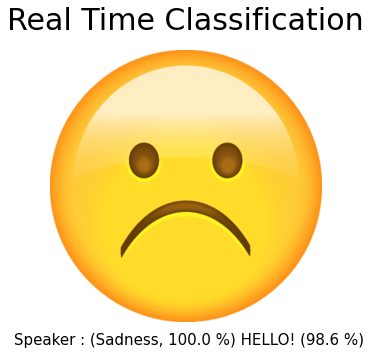

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

time.sleep(5)

path_expression = "/content/gdrive/MyDrive/Real_Time_Classification/%s.png" % f_list_Facial[predicted_f]
print(path_expression)

img = Image.open(path_expression)

plt.figure(figsize = (5, 5))
plt.xlabel('Speaker : ' + f_list_Vocal[predicted_f] + f_list_Vocal[predicted_v], fontsize = 20, labelpad = 20)
plt.title('Real Time Classification',fontsize = 30, pad = 20)
plt.text(-80, 650, 'Speaker : (' + f_list_Facial[predicted_f] + ', {:.1f} %) '.format(100 * prob_f) + f_list_Vocal[predicted_v] + '! ({:.1f} %)'.format(100 * prob_v), fontsize = 15)
plt.axis('off')
plt.imshow(img)
plt.show()